In [2]:
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import glob
import math
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [4]:
basedir = os.getcwd()
datadir = basedir + '/data'

# reading the csv file with annotated image file names
train_cultivar= pd.read_csv(datadir + '/train_cultivar_mapping.csv')
train_cultivar.dropna(inplace=True)

# turning cultivar labels into strings
train_cultivar['cultivar']=train_cultivar['cultivar'].astype(str)
train_cultivar.head()

,image,cultivar
0,2017-06-16__12-24-20-930.png,PI_257599
1,2017-06-02__16-48-57-866.png,PI_154987
2,2017-06-12__13-18-07-707.png,PI_92270
3,2017-06-22__13-18-06-841.png,PI_152651
4,2017-06-26__12-56-48-642.png,PI_176766


In [5]:
# creating list of unique cultivars
labels=list(np.unique(train_cultivar['cultivar']))

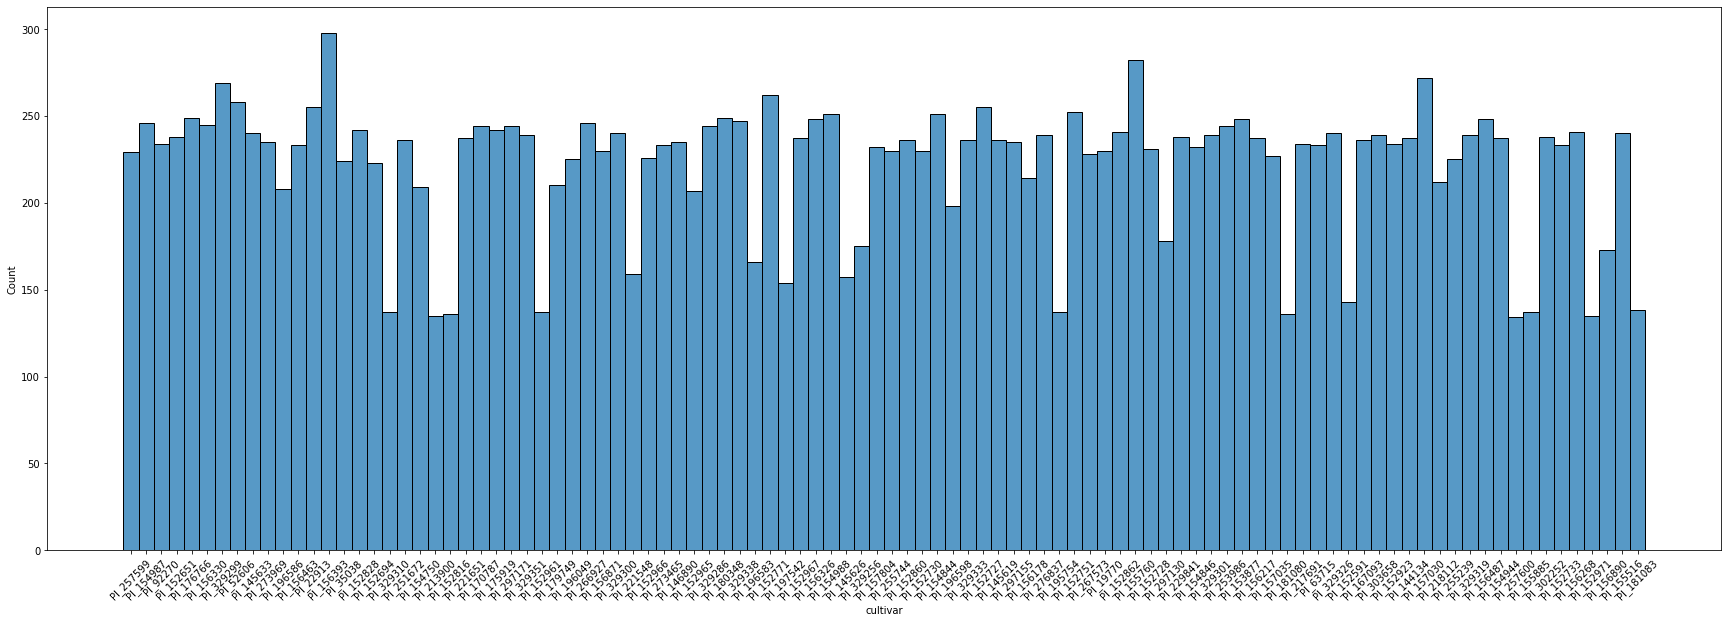

In [7]:
# visualizing frequency of cultivars 

import seaborn as sns
a=pd.DataFrame({'cultivar':train_cultivar['cultivar']})
plt.figure(figsize=(30,10))
sns.histplot(a,x='cultivar')
plt.xticks(rotation=45)
plt.show()

In [9]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.9, horizontal_flip=True, shear_range=0.2, validation_split = 0.2)
train_data=train_datagen.flow_from_dataframe(train_cultivar, datadir + "/train_images/",color_mode='rgb', batch_size=32, x_col='image', y_col='cultivar' , classes=labels , class_mode='categorical', target_size=(300, 300))

Found 22193 validated image filenames belonging to 100 classes.
